In [20]:
import os
import pandas as pd
import plotly.graph_objects as go

In [30]:
def read_scattered_data(file_path):
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Buscar el índice donde terminan los metadatos
    data_start_index = 0
    for i, line in enumerate(lines):
        if line.strip() == "# End:":  # Detecta el final de los metadatos
            data_start_index = i + 1
            break

    # Extraer las líneas de datos a partir del índice identificado
    data_lines = lines[data_start_index:]

    # Parsear los datos numéricos
    data = []
    for line in data_lines:
        # Omitir líneas vacías o con caracteres inesperados
        if line.strip() and not line.startswith("#"):
            try:
                values = list(map(float, line.split()))  # Convertir a float
                data.append(values)
            except ValueError:
                print(f"Línea no procesada en {file_path}: {line.strip()}")
                continue

    # Verificar si hay datos válidos
    if not data:
        raise ValueError(f"No se encontraron datos válidos en el archivo {file_path}")

    # Crear un DataFrame con los datos cargados
    return pd.DataFrame(data, columns=['X', 'Y', 'Z', 'Column', 'Row'])

# Ruta a la carpeta con los archivos
folder_path = r'C:\Users\Acer\Desktop\Volve_Dash\Volve_Field\Volve_app_gmp\data\Surfaces\Formations'

# Obtener una lista de archivos en la carpeta
available_files = [file_name for file_name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file_name))]

# Mostrar la lista de archivos disponibles
print("Archivos disponibles:")
for idx, file in enumerate(available_files, start=1):
    print(f"{idx}. {file}")

# Pedir al usuario que selecci


Archivos disponibles:
1. Base_Hugin
2. Base_Hugin.crsmeta.xml
3. Draupne_Top
4. Draupne_Top.crsmeta.xml
5. Hugin_Top
6. Hugin_Top.crsmeta.xml
7. Seafloor
8. Seafloor.crsmeta.xml
9. Ty_Base
10. Ty_Base.crsmeta.xml
11. Ty_Top
12. Ty_Top.crsmeta.xml
13. Utisra_Base
14. Utisra_Base.crsmeta.xml
15. Utisra_Top
16. Utisra_Top.crsmeta.xml


In [32]:
# Pedir al usuario que seleccione uno o más archivos
selected_indices = input("Selecciona los archivos que deseas abrir (separados por comas): ")

try:
    # Convertir la entrada en una lista de índices
    selected_indices = [int(idx.strip()) - 1 for idx in selected_indices.split(",")]
    selected_files = [available_files[idx] for idx in selected_indices if 0 <= idx < len(available_files)]
except ValueError:
    print("Entrada inválida. Por favor, usa números separados por comas.")
    selected_files = []

# Diccionario para almacenar los datos de los archivos
all_data = {}

# Abrir y almacenar los datos de los archivos seleccionados
for file_name in selected_files:
    file_path = os.path.join(folder_path, file_name)
    try:
        data = read_scattered_data(file_path)
        all_data[file_name] = data  # Guardar el DataFrame con el nombre del archivo como clave
        print(f"Archivo {file_name} cargado correctamente.")
    except Exception as e:
        print(f"Error al abrir el archivo {file_name}: {e}")

# Concatenar todos los DataFrames en uno solo
combined_data = pd.concat(all_data.values(), ignore_index=True)

# Mostrar el DataFrame combinado
print("\nDatos combinados:")
print(combined_data)

Selecciona los archivos que deseas abrir (separados por comas):  1


Archivo Base_Hugin cargado correctamente.

Datos combinados:
                   X             Y            Z  Column    Row
0      438550.553564  6.475564e+06  2939.924805   144.0    2.0
1      438600.553564  6.475564e+06  2946.646729   145.0    2.0
2      438650.553564  6.475564e+06  2953.871094   146.0    2.0
3      438700.553564  6.475564e+06  2964.154785   147.0    2.0
4      438350.553564  6.475614e+06  2960.468994   140.0    3.0
...              ...           ...          ...     ...    ...
14498  432850.553564  6.481914e+06  3648.985596    30.0  129.0
14499  432900.553564  6.481914e+06  3646.311279    31.0  129.0
14500  432600.553564  6.481964e+06  3582.928711    25.0  130.0
14501  432650.553564  6.481964e+06  3613.045898    26.0  130.0
14502  432700.553564  6.481964e+06  3640.453369    27.0  130.0

[14503 rows x 5 columns]


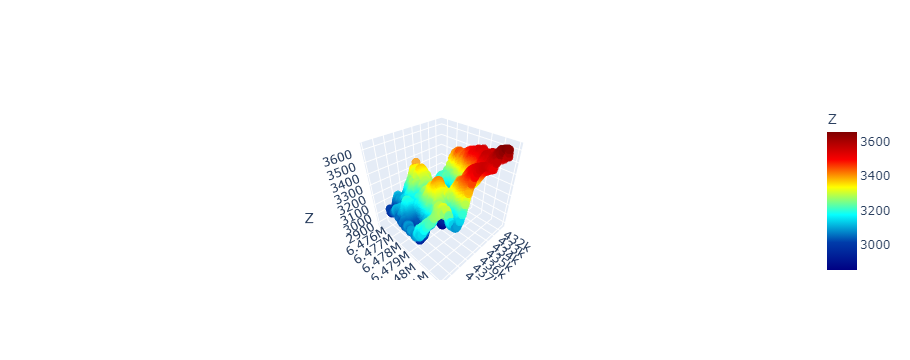

In [36]:
import plotly.graph_objects as go

# Supongamos que 'combined_data' es el DataFrame que contiene tus datos

# Crear la figura en 3D
fig = go.Figure()

# Agregar los datos al gráfico 3D
fig.add_trace(go.Scatter3d(
    x=combined_data['X'],  # Coordenadas X
    y=combined_data['Y'],  # Coordenadas Y
    z=combined_data['Z'],  # Coordenadas Z
    mode='markers',  # Usar puntos como marcador
    marker=dict(
        size=5,  # Tamaño de los puntos (ajustado)
        color=combined_data['Z'],  # Color por la coordenada Z para diferenciar alturas
        colorscale='Jet',  # Escala de colores 'Jet'
        colorbar=dict(title="Z"),  # Título en la barra de colores
        opacity=0.8  # Transparencia
    ),
    name="Datos 3D"
))

# Configuración de los ejes con escala X e Y igual
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z',
    #xaxis=dict(scaleanchor="y"),  # Establecer la misma escala para X y Y
    zaxis=dict(
        range=[combined_data['Z'].min(), combined_data['Z'].max()]  # Ajuste de la escala Z
    )
))

# Mostrar la figura
fig.show()
